# Function approximation by an NN

A neural network is used here to find an unknown function from noisy measurements. Please note that, as opposed to what has been previously done with regression-type models, here we have no information (nor hypotheses) about the function's structure or form. This is therefore a true inverse problem: from noisy measurements,  find the unknown function that generated them.

![](direct_inverse.png)

In this example, the function $f(x)$ is defined as the sine function. 

- We approximate it using a fully connected neural network with three hidden layers of size 32. 
- The model is trained using the mean squared error loss function (`nn.MSELoss`).
- The Adam and LBGFGS optimizers are used (`optim.Adam`, `optim.LBFGS`). 

The training loop runs for 1000 epochs, and the loss is printed every 100 epochs. After training, the evolution of the function approximation is plotted, and the final loss is displayed.

You can modify the code according to your specific function f(x) and adjust the neural network architecture, loss function, optimizer, and training parameters as needed.


Epoch [100/1000], Loss: 0.0565
Epoch [200/1000], Loss: 0.0022
Epoch [300/1000], Loss: 0.0012
Epoch [400/1000], Loss: 0.0050
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0005
Epoch [700/1000], Loss: 0.0037
Epoch [800/1000], Loss: 0.0002
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0001


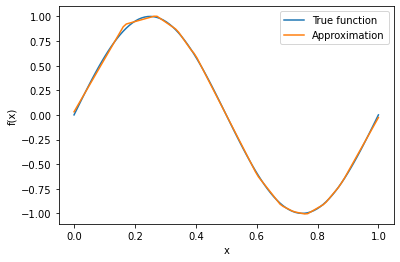

Final Loss: 0.0001474


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sin(2 * np.pi * x)

# Generate some discrete points in the interval [0, 1]
x = np.linspace(0, 1, 100)
y_true = f(x)

# Convert the data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32).view(-1, 1)

# Define the fully connected neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the neural network model
model = NeuralNetwork()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_true_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track the loss
    losses.append(loss.item())

    # Print the progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the evolution of the function approximation
plt.plot(x, y_true, label='True function')
plt.plot(x, model(x_tensor).detach().numpy(), label='Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the final loss
print(f"Final Loss: {losses[-1]:.4g}")


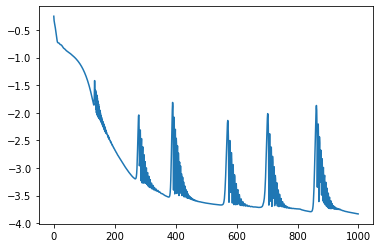

In [11]:
plt.plot(np.log10(losses))

## Refactor using LBFGS

In this modified version, we replaced the Adam optimizer with the LBFGS optimizer (`optim.LBFGS`). 

The LBFGS optimizer in PyTorch requires a `closure` function that computes both the forward and backward passes. The closure function is passed to the optimizer's `step()` method, which performs a single optimization step. The loss is computed and backpropagation is performed inside the closure function.

The rest of the code remains the same as before, including the definition of the neural network, the loss function, and the training loop. The evolution of the function approximation is plotted, and the final loss is displayed at the end.



Epoch [1/100], Loss: 0.5195
Epoch [2/100], Loss: 0.3793
Epoch [3/100], Loss: 0.2186
Epoch [4/100], Loss: 0.1786
Epoch [5/100], Loss: 0.1586
Epoch [6/100], Loss: 0.1475
Epoch [7/100], Loss: 0.1368
Epoch [8/100], Loss: 0.1109
Epoch [9/100], Loss: 0.0458
Epoch [10/100], Loss: 0.0248
Epoch [11/100], Loss: 0.0118
Epoch [12/100], Loss: 0.0081
Epoch [13/100], Loss: 0.0066
Epoch [14/100], Loss: 0.0054
Epoch [15/100], Loss: 0.0046
Epoch [16/100], Loss: 0.0039
Epoch [17/100], Loss: 0.0031
Epoch [18/100], Loss: 0.0027
Epoch [19/100], Loss: 0.0024
Epoch [20/100], Loss: 0.0022
Epoch [21/100], Loss: 0.0019
Epoch [22/100], Loss: 0.0017
Epoch [23/100], Loss: 0.0016
Epoch [24/100], Loss: 0.0011
Epoch [25/100], Loss: 0.0011
Epoch [26/100], Loss: 0.0011
Epoch [27/100], Loss: 0.0010
Epoch [28/100], Loss: 0.0010
Epoch [29/100], Loss: 0.0009
Epoch [30/100], Loss: 0.0009
Epoch [31/100], Loss: 0.0009
Epoch [32/100], Loss: 0.0008
Epoch [33/100], Loss: 0.0008
Epoch [34/100], Loss: 0.0008
Epoch [35/100], Loss: 0

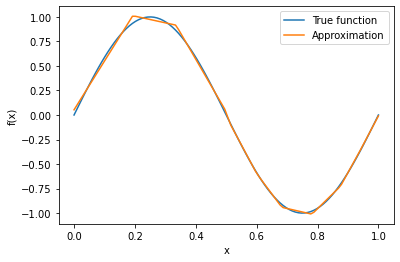

Final Loss: 0.0004


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sin(2 * np.pi * x)

# Generate some discrete points in the interval [0, 1]
x = np.linspace(0, 1, 100)
y_true = f(x)

# Convert the data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_true_tensor = torch.tensor(y_true, dtype=torch.float32).view(-1, 1)

# Define the fully connected neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x)) # or torch.tanh()
        x = torch.relu(self.fc2(x)) # or torch.tanh()
        x = self.fc3(x)
        return x

# Create an instance of the neural network model
model = NeuralNetwork()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100

def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_true_tensor)
    loss.backward()
    return loss

losses = []
for epoch in range(num_epochs):
    loss = optimizer.step(closure)
    losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the evolution of the function approximation
plt.plot(x, y_true, label='True function')
plt.plot(x, model(x_tensor).detach().numpy(), label='Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Display the final loss
print(f"Final Loss: {losses[-1]:.4f}")


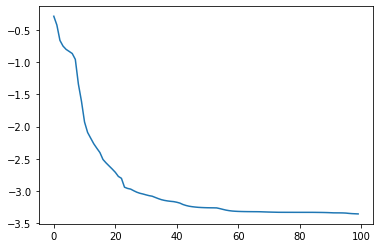

In [9]:
plt.plot(np.log10(losses))

In [12]:
model

NeuralNetwork(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

## Conclusions

1. A simple fully-connected, feedforward neural network is able to find a completely unknown function, based exclusively on noisy measurements.
2. The LBFGS optimizer, when suitably tuned and adapted to the problem, can provide smoother and much faster convergence of the NN model.